In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [134]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
df=pd.read_csv('./data/city_province_newlyweds_overal.csv')

In [4]:
df # 단위 쌍

,행정구역별,시점,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수
0,전국,2015,1471647,595850,40.5,640709,43.5,828486,1.3,0.93
1,전국,2016,1436948,603281,42.0,633642,44.1,827329,1.3,0.92
2,전국,2017,1379766,585957,42.5,616621,44.7,801757,1.3,0.91
3,전국,2018,1322406,594409,44.9,594721,45.0,771206,1.3,0.87
4,전국,2019,1260117,582985,46.3,557592,44.2,721051,1.3,0.84
...,...,...,...,...,...,...,...,...,...,...
121,제주특별자치도,2017,18546,8030,43.3,7972,43.0,10794,1.4,1.01
122,제주특별자치도,2018,18387,8294,45.1,7950,43.2,11094,1.4,0.97
123,제주특별자치도,2019,17682,8114,45.9,7616,43.1,10455,1.4,0.95
124,제주특별자치도,2020,16868,7941,47.1,7161,42.5,9899,1.4,0.93


In [5]:
# 특성별 신혼부부 수 통계

In [6]:
# (2015-2021)우리나라 전국 총 신혼부부(연도별)

In [7]:
df01 = df.loc[df['행정구역별'] == '전국',['시점','신혼부부 수 (A)']]

In [8]:
df01

,시점,신혼부부 수 (A)
0,2015,1471647
1,2016,1436948
2,2017,1379766
3,2018,1322406
4,2019,1260117
5,2020,1183750
6,2021,1101455


In [24]:
# sb.barplot(data=df01, x='시점', y='신혼부부 수 (A)')
# plt.xlabel('연도')
# plt.ylabel('신혼부부 수(쌍)')
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')
# plt.show()

In [305]:

fig = px.bar(df01, x='시점', y='신혼부부 수 (A)',
             text_auto=False, color = '신혼부부 수 (A)',
            title='우리나라 총 신혼부부 수(15-21년도)',color_continuous_scale='peach')
fig.update_layout(
                 title_x = 0.5,
                 title_y = 0.9,
                 title_xanchor = "center",
                 title_yanchor = "middle")
fig.show()

In [10]:
# (2015-2021)우리나라 전국 총 신혼부부 수(시도별)

In [39]:
df02 = df[['시점','행정구역별','신혼부부 수 (A)']]

In [41]:
df02 = df02.drop(df02[df02['행정구역별'] == '전국'].index,axis=0)

In [44]:
# ax=sb.lineplot(data=df02, x='시점', y='행정구역별', color='g', marker='o')
# plt.title('서울특별시 연도별 신혼부부 수')
# plt.xlabel('연도')
# plt.ylabel('신혼부부 수(쌍)')
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')
# ax.set_ylim(100000)
# plt.show()

In [57]:
fig = px.line(df02, x='시점', y='신혼부부 수 (A)', color='행정구역별',markers=True)

fig.show()

In [14]:
#신혼부부 특성별 소득 현황

In [113]:
df2 = pd.read_csv('./data/newlywed_couple_ income_status.csv')

In [114]:
df2

,시점,신혼부부 특성별(1),신혼부부 특성별(2),소득구간별(1),데이터
0,2015,전국,소계,소득 평균 (만원),4569
1,2015,혼인연차별,혼인1년차,소득 평균 (만원),4636
2,2015,혼인연차별,혼인2년차,소득 평균 (만원),4442
3,2015,혼인연차별,혼인3년차,소득 평균 (만원),4441
4,2015,혼인연차별,혼인4년차,소득 평균 (만원),4642
...,...,...,...,...,...
205,2021,맞벌이여부별,미상,소득 평균 (만원),967
206,2021,출산자녀수별,무자녀,소득 평균 (만원),6684
207,2021,출산자녀수별,유자녀,소득 평균 (만원),5655
208,2021,주택소유물건수별,주택 미소유,소득 평균 (만원),5521


In [115]:
df2 = df2.rename(columns={'데이터':'소득 평균(만원)'})

In [308]:
df2

,시점,신혼부부 특성별(1),신혼부부 특성별(2),소득구간별(1),소득 평균(만원)
0,2015,전국,소계,소득 평균 (만원),4569
1,2015,혼인연차별,혼인1년차,소득 평균 (만원),4636
2,2015,혼인연차별,혼인2년차,소득 평균 (만원),4442
3,2015,혼인연차별,혼인3년차,소득 평균 (만원),4441
4,2015,혼인연차별,혼인4년차,소득 평균 (만원),4642
...,...,...,...,...,...
205,2021,맞벌이여부별,미상,소득 평균 (만원),967
206,2021,출산자녀수별,무자녀,소득 평균 (만원),6684
207,2021,출산자녀수별,유자녀,소득 평균 (만원),5655
208,2021,주택소유물건수별,주택 미소유,소득 평균 (만원),5521


In [306]:
df2.drop('소득구간별(1)',axis=1)

,시점,신혼부부 특성별(1),신혼부부 특성별(2),소득 평균(만원)
0,2015,전국,소계,4569
1,2015,혼인연차별,혼인1년차,4636
2,2015,혼인연차별,혼인2년차,4442
3,2015,혼인연차별,혼인3년차,4441
4,2015,혼인연차별,혼인4년차,4642
...,...,...,...,...
205,2021,맞벌이여부별,미상,967
206,2021,출산자녀수별,무자녀,6684
207,2021,출산자녀수별,유자녀,5655
208,2021,주택소유물건수별,주택 미소유,5521


In [307]:
df2['신혼부부 특성별(1)'].unique() 

array(['전국', '혼인연차별', '시도별', '맞벌이여부별', '출산자녀수별', '주택소유물건수별'], dtype=object)

In [123]:
df2_result = (df2['시점']==2015) & (df2['신혼부부 특성별(2)']=='혼인1년차')

In [119]:
df2_result

0      False
1       True
2      False
3      False
4      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 210, dtype: bool

In [124]:
df2_result_final = df2.loc[df2_result,'소득 평균(만원)'].values

In [125]:
df2_result_final[0]

4636

In [24]:
#2. 신혼부부 주택 소유 비중

In [63]:
df3 = pd.read_csv('./data/house_newlyweds.csv')

In [64]:
df3

,시점,신혼부부 특성별(1),신혼부부 특성별(2),주택 미소유,주택 소유
0,2015,전국,소계,830938,640709
1,2015,혼인연차별,혼인 1년차,185221,105545
2,2015,혼인연차별,혼인 2년차,177166,117796
3,2015,혼인연차별,혼인 3년차,166415,133128
4,2015,혼인연차별,혼인 4년차,157563,139555
...,...,...,...,...,...
212,2021,남편 연령별,30~34세,211626,129404
213,2021,남편 연령별,35~39세,176400,153410
214,2021,남편 연령별,40~44세,72814,71140
215,2021,남편 연령별,45~49세,31254,33697


In [65]:
df3['주택 소유'] = df3['주택 소유'].str.replace('X','0')

In [66]:
df3['주택 소유']=df3['주택 소유'].astype(int)

In [67]:
df3

,시점,신혼부부 특성별(1),신혼부부 특성별(2),주택 미소유,주택 소유
0,2015,전국,소계,830938,640709
1,2015,혼인연차별,혼인 1년차,185221,105545
2,2015,혼인연차별,혼인 2년차,177166,117796
3,2015,혼인연차별,혼인 3년차,166415,133128
4,2015,혼인연차별,혼인 4년차,157563,139555
...,...,...,...,...,...
212,2021,남편 연령별,30~34세,211626,129404
213,2021,남편 연령별,35~39세,176400,153410
214,2021,남편 연령별,40~44세,72814,71140
215,2021,남편 연령별,45~49세,31254,33697


In [68]:
df3_sum = df3[['주택 미소유','주택 소유']].sum(axis=1)

In [128]:
df3['주택 보유율'] = (df3['주택 소유']/df3_sum*100).round(2)

In [129]:
df3

,시점,신혼부부 특성별(1),신혼부부 특성별(2),주택 미소유,주택 소유,주택 보유율
0,2015,전국,소계,830938,640709,43.54
1,2015,혼인연차별,혼인 1년차,185221,105545,36.30
2,2015,혼인연차별,혼인 2년차,177166,117796,39.94
3,2015,혼인연차별,혼인 3년차,166415,133128,44.44
4,2015,혼인연차별,혼인 4년차,157563,139555,46.97
...,...,...,...,...,...,...
212,2021,남편 연령별,30~34세,211626,129404,37.95
213,2021,남편 연령별,35~39세,176400,153410,46.51
214,2021,남편 연령별,40~44세,72814,71140,49.42
215,2021,남편 연령별,45~49세,31254,33697,51.88


In [71]:
# 우리나라 총 신혼부부 주택 소유 비중(단위 : 쌍)

In [130]:
df30 =df3.loc[df3['신혼부부 특성별(1)']=='전국',['시점','주택 보유율']]

In [131]:
df30

,시점,주택 보유율
0,2015,43.54
31,2016,44.10
62,2017,44.69
93,2018,44.97
124,2019,44.25
155,2020,43.63
186,2021,43.56


In [132]:
df30['주택 보유율']=df30['주택 보유율'].round(2)

In [156]:
# ax = sb.barplot(data=df30, x='시점', y="주택 보유율", )

# plt.title('연도별 신혼부부 주택보유율(%)')
# plt.xlabel('연도')
# ax.set_ylim(30)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2., height +1, height, ha = 'center', size = 9)

# plt.show()

In [198]:
fig = px.bar(df30, x='시점', y='주택 보유율', title='연도별 신혼부부 주택보유율(%)', 
             color='주택 보유율', color_continuous_scale='burg')
fig.update_yaxes(range=[40, 45])

fig.show()

In [76]:
df3

,시점,신혼부부 특성별(1),신혼부부 특성별(2),주택 미소유,주택 소유,주택 보유율
0,2015,전국,소계,830938,640709,43.536867
1,2015,혼인연차별,혼인 1년차,185221,105545,36.298948
2,2015,혼인연차별,혼인 2년차,177166,117796,39.935992
3,2015,혼인연차별,혼인 3년차,166415,133128,44.443703
4,2015,혼인연차별,혼인 4년차,157563,139555,46.969554
...,...,...,...,...,...,...
212,2021,남편 연령별,30~34세,211626,129404,37.945049
213,2021,남편 연령별,35~39세,176400,153410,46.514660
214,2021,남편 연령별,40~44세,72814,71140,49.418564
215,2021,남편 연령별,45~49세,31254,33697,51.880648


In [181]:
df34 = df3.loc[(df3['시점']==2021) & (df3['신혼부부 특성별(1)']=='혼인연차별'),['신혼부부 특성별(2)','주택 보유율']]
df34['주택 보유율']=df34['주택 보유율'].round(2)
df34=df34.rename(columns={'주택 보유율':'21년 주택 보유율'}).reset_index()

In [182]:
df35 = df3.loc[(df3['시점']==2015) & (df3['신혼부부 특성별(1)']=='혼인연차별'),['신혼부부 특성별(2)','주택 보유율']]
df35['주택 보유율']=df35['주택 보유율'].round(2)
df35=df35.rename(columns={'주택 보유율':'15년 주택 보유율'}).reset_index()

In [183]:
df35['21년 주택 보유율']=df34['21년 주택 보유율']

In [184]:
df35

,index,신혼부부 특성별(2),15년 주택 보유율,21년 주택 보유율
0,1,혼인 1년차,36.30,33.81
1,2,혼인 2년차,39.94,38.12
2,3,혼인 3년차,44.44,42.84
3,4,혼인 4년차,46.97,48.14
4,5,혼인 5년차,50.02,52.37


In [185]:
# plt.figure(figsize=(12,5))

# plt. subplot(1,2,1)

# ax= sb.barplot(data=df35, y='주택 보유율', x='신혼부부 특성별(2)')
# plt.title('15년도 혼인연차별 신혼부부 주택보유율(%)')
# plt.xlabel('혼인연차별')
# ax.set_ylim(20)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2., height +1, height, ha = 'center', size = 9)

    
# plt. subplot(1,2,2)

# ax= sb.barplot(data=df34, y='주택 보유율', x='신혼부부 특성별(2)')
# plt.title('21년도 혼인연차별 신혼부부 주택보유율(%)')
# plt.xlabel('혼인연차별')
# ax.set_ylim(20)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2., height +1, height, ha = 'center', size = 9)

    
    
# plt.show()

In [192]:
fig = px.bar(df35, x="신혼부부 특성별(2)", y=["15년 주택 보유율","21년 주택 보유율"]
             ,barmode="group")
fig.update_yaxes(range=[30, 55])

fig.show()

In [42]:
#신혼부부 특성별 평균 소득 현황(주택소유 여부에 따른 소득 차이)

In [107]:
df4 = pd.read_csv('./data/newlywed_house_salary.csv')

In [108]:
df4

,시점,신혼부부 특성별(1),신혼부부 특성별(2),소득구간별(1),데이터
0,2015,주택소유물건수별,주택 미소유,소득 평균 (만원),4133
1,2015,주택소유물건수별,주택 소유,소득 평균 (만원),5135
2,2016,주택소유물건수별,주택 미소유,소득 평균 (만원),4368
3,2016,주택소유물건수별,주택 소유,소득 평균 (만원),5297
4,2017,주택소유물건수별,주택 미소유,소득 평균 (만원),4588
5,2017,주택소유물건수별,주택 소유,소득 평균 (만원),5535
6,2018,주택소유물건수별,주택 미소유,소득 평균 (만원),4762
7,2018,주택소유물건수별,주택 소유,소득 평균 (만원),5787
8,2019,주택소유물건수별,주택 미소유,소득 평균 (만원),4893
9,2019,주택소유물건수별,주택 소유,소득 평균 (만원),5992


In [112]:
df4.loc[(df4['시점']==2021),["신혼부부 특성별(2)","데이터"]]

,신혼부부 특성별(2),데이터
12,주택 미소유,5521
13,주택 소유,6818


In [47]:
#  03 맞벌이 신혼부부 비중

In [48]:
# 우리나라 총 신혼부부 맞벌이 비중(연도별)

In [202]:
df5 = pd.read_csv('./data/newlywed_all.csv')

In [203]:
df5

,시점,행정구역별,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수
0,2015,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93
1,2016,전국,1436948,603281,42.0,633642,44.1,827329,1.3,0.92
2,2017,전국,1379766,585957,42.5,616621,44.7,801757,1.3,0.91
3,2018,전국,1322406,594409,44.9,594721,45.0,771206,1.3,0.87
4,2019,전국,1260117,582985,46.3,557592,44.2,721051,1.3,0.84
5,2020,전국,1183750,580089,49.0,516481,43.6,663221,1.3,0.81
6,2021,전국,1101455,569472,51.7,479791,43.6,603763,1.3,0.80


In [208]:
fig = px.bar(df5, x='시점', y='맞벌이 비율 (B/A*100)', title='연도별 우리나라 총 신혼부부 맞벌이 비중' 
             ,color='맞벌이 비율 (B/A*100)', color_continuous_scale='burg')
fig.update_yaxes(range=[35, 60])

fig.show()

In [52]:
# 신혼 부부의 맞벌이/외벌이 추이(%)(15~21년 자료 그래프로 표시)

In [210]:
df5['외벌이 비율 ((A-B)/A*100)']=(df5['신혼부부 수 (A)']-df5['맞벌이 부부 수 (B)'])/df5['신혼부부 수 (A)']*100

In [211]:
df5['외벌이 비율 ((A-B)/A*100)'] =df5['외벌이 비율 ((A-B)/A*100)'].round(2)

In [212]:
df5

,시점,행정구역별,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수,외벌이 비율 ((A-B)/A*100)
0,2015,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,59.51
1,2016,전국,1436948,603281,42.0,633642,44.1,827329,1.3,0.92,58.02
2,2017,전국,1379766,585957,42.5,616621,44.7,801757,1.3,0.91,57.53
3,2018,전국,1322406,594409,44.9,594721,45.0,771206,1.3,0.87,55.05
4,2019,전국,1260117,582985,46.3,557592,44.2,721051,1.3,0.84,53.74
5,2020,전국,1183750,580089,49.0,516481,43.6,663221,1.3,0.81,51.00
6,2021,전국,1101455,569472,51.7,479791,43.6,603763,1.3,0.80,48.30


In [216]:
df5554 = df5[['시점','맞벌이 비율 (B/A*100)','외벌이 비율 ((A-B)/A*100)']]
df5554

,시점,맞벌이 비율 (B/A*100),외벌이 비율 ((A-B)/A*100)
0,2015,40.5,59.51
1,2016,42.0,58.02
2,2017,42.5,57.53
3,2018,44.9,55.05
4,2019,46.3,53.74
5,2020,49.0,51.00
6,2021,51.7,48.30


In [220]:
fig = px.line(df5554, x='시점', y=['맞벌이 비율 (B/A*100)','외벌이 비율 ((A-B)/A*100)'],markers=True)

fig.show()

In [58]:
# 혼인연차별 맞벌이 비중(셀렉트박스 활용) n년차 부부 맞벌이 비중

In [229]:
df6 = pd.read_csv('./data/couple_work.csv')

In [230]:
df6['전체'] = df6['맞벌이']+df6['외벌이']

df6

In [231]:
fgg=df6['맞벌이']/df6['전체']*100

In [232]:
df6['맞벌이 비율']=fgg.round(2)

In [233]:
df6

,시점,신혼부부 특성별(1),신혼부부 특성별(2),맞벌이,외벌이,전체,맞벌이 비율
0,2021,혼인연차별,혼인 1년차,107972,70349,178321,60.55
1,2021,혼인연차별,혼인 2년차,112582,82591,195173,57.68
2,2021,혼인연차별,혼인 3년차,114331,95806,210137,54.41
3,2021,혼인연차별,혼인 4년차,117770,103311,221081,53.27
4,2021,혼인연차별,혼인 5년차,116817,105012,221829,52.66


In [228]:
df6.loc[df6['신혼부부 특성별(2)']=='혼인 1년차','맞벌이 비율']

0    60.55
Name: 맞벌이 비율, dtype: float64

In [67]:
# 혼인연차별 첫째자녀 출산하는 부부 수

In [238]:
df7=pd.read_csv('./data/couple_baby.csv')

In [246]:
df7 =df7.rename(columns={'데이터':'첫자녀 출산 부부'})
df7
df6['첫자녀 출산 부부']=df7['첫자녀 출산 부부']
df6

,시점,신혼부부 특성별(1),신혼부부 특성별(2),맞벌이,외벌이,전체,맞벌이 비율,첫자녀 출산 부부
0,2021,혼인연차별,혼인 1년차,107972,70349,178321,60.55,54698
1,2021,혼인연차별,혼인 2년차,112582,82591,195173,57.68,97484
2,2021,혼인연차별,혼인 3년차,114331,95806,210137,54.41,136244
3,2021,혼인연차별,혼인 4년차,117770,103311,221081,53.27,167010
4,2021,혼인연차별,혼인 5년차,116817,105012,221829,52.66,184064


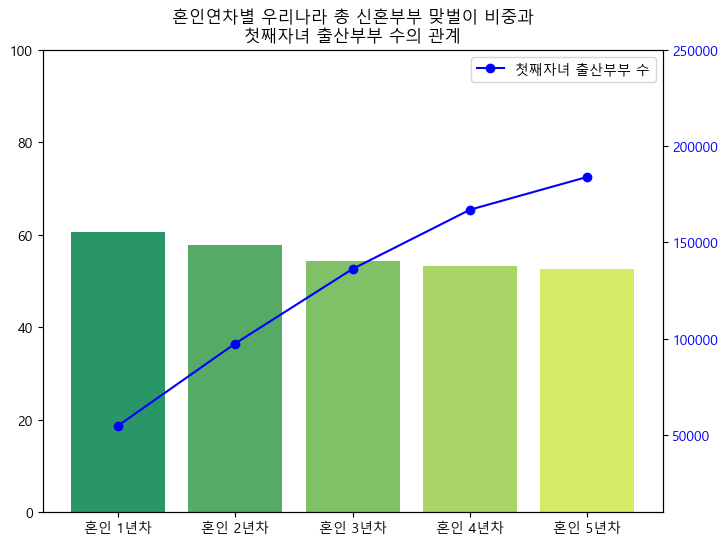

In [70]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

colors = sb.color_palette('summer',len(df6['신혼부부 특성별(2)']))

ax1.bar(df6['신혼부부 특성별(2)'], df6["맞벌이 비율"], color=colors, label='맞벌이 비율')
plt.ylim(0,100)
ax2 = ax1.twinx()

colors2='blue'

ax2.plot(df7['신혼부부 특성별(2)'], df7["데이터"], color=colors2,marker='o', label='첫째자녀 출산부부 수')
ax2.tick_params(axis='y', labelcolor=colors2)


plt.title('혼인연차별 우리나라 총 신혼부부 맞벌이 비중과\n첫째자녀 출산부부 수의 관계')
plt.xlabel('혼인연차')
plt.legend()
plt.ylim(10000,250000)
plt.show()

In [250]:
# fig = px.line(df6, x='신혼부부 특성별(2)', y=['맞벌이 비율','첫자녀 출산 부부'],markers=True)


# fig.show()

In [71]:
# 가사분담은 어떻게 해야한다고 생각하는지?

In [72]:
# 가사분담에 대한 견해 (통계청_2022년 사회조사 결과 참고)

In [251]:
df8=pd.read_csv('./data/homework.csv')

In [252]:
df8

,특성별(1),견해별(1),2022
0,전체,남편이 전적으로 책임,0.5
1,전체,남편이 주로 하고 아내도 분담,2.6
2,전체,공평하게 분담,74.7
3,전체,아내가 주로 하고 남편도 분담,16.9
4,전체,아내가 전적으로 책임,5.3


In [302]:
fig = px.pie(df8, values='2022', names=['남편이 전적으로 책임','남편이 주로 하고 아내도 분담','공평하게 분담','아내가 주로 하고 남편도 분담','아내가 전적으로 책임'])
fig.update_traces(marker_colors =px.colors.qualitative.Set3)
fig.show()

In [263]:
# plt.pie(df8['2022'],labels=df8['견해별(1)'])
# plt.show()

In [254]:
# 실제 가사 분담은 어떻게 이루어지고 있는지?

In [264]:
df9=pd.read_csv('./data/homework_real.csv')

In [265]:
df9

,특성별(1),분담실태별(1),2022
0,전체,남편이 전적으로 책임,1.3
1,전체,남편이 주로 하고 아내도 분담,6.7
2,전체,공평하게 분담,30.6
3,전체,아내가 주로 하고 남편도 분담,34.9
4,전체,아내가 전적으로 책임,26.5


In [295]:
fig = px.pie(df9, values='2022', names=['남편이 전적으로 책임','남편이 주로 하고 아내도 분담','공평하게 분담','아내가 주로 하고 남편도 분담','아내가 전적으로 책임'])
fig.update_traces(marker_colors =px.colors.qualitative.Set3)

fig.show()

In [268]:
# plt.pie(df9['2022'],labels=df9['분담실태별(1)'])
# plt.show()

In [303]:
fig = px.bar(df35, x="신혼부부 특성별(2)", y=["15년 주택 보유율","21년 주택 보유율"]
             ,barmode="group")
fig.update_yaxes(range=[30, 55])

fig.show()

fig = make_subplots(rows=1, cols=2)
fig = px.pie(df8, values='2022', names='견해별(1)')
fig = px.pie(df9, values='2022', names='분담실태별(1)')

fig.show()


In [258]:
df8
df8['2022']

0     0.5
1     2.6
2    74.7
3    16.9
4     5.3
Name: 2022, dtype: float64

In [259]:

df9


,특성별(1),분담실태별(1),2022
0,전체,남편이 전적으로 책임,1.3
1,전체,남편이 주로 하고 아내도 분담,6.7
2,전체,공평하게 분담,30.6
3,전체,아내가 주로 하고 남편도 분담,34.9
4,전체,아내가 전적으로 책임,26.5


In [260]:
# 견해와 실태의 차이 %

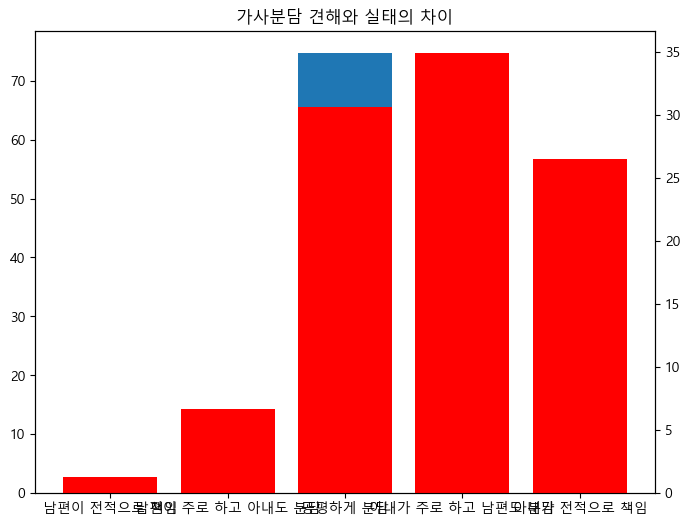

In [261]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax1 = fig.add_subplot()


ax1.bar(df8['견해별(1)'], df8['2022'], label='견해')
ax2 = ax1.twinx()


ax2.bar(df9['분담실태별(1)'],df9['2022'],color='r', label='실태')

plt.title('가사분담 견해와 실태의 차이')
plt.show()